### Regresión polinómica para 2 variables (1 independiente y 1 dependiente)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score


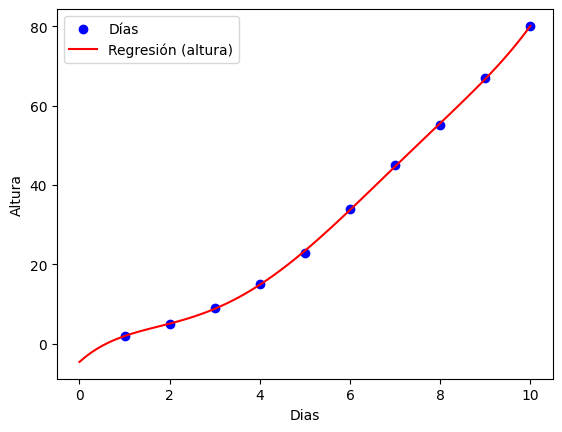

Coeficientes:  [ 0.00000000e+00  1.02073193e+01 -4.96153846e+00  1.40641026e+00
 -1.46620047e-01  5.38461538e-03]
-4.533333333156804


In [9]:
dias = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
altura_planta = np.array([2, 5, 9, 15, 23, 34, 45, 55, 67, 80])

caracteristicas = PolynomialFeatures(degree=5)
polinomio_dias = caracteristicas.fit_transform(dias)
modelo = LinearRegression()
modelo.fit(polinomio_dias, altura_planta)

dias_pred = np.linspace(0, 10, 100).reshape(-1, 1)
polinomio_dias_pred = caracteristicas.fit_transform(dias_pred)

altura_pred = modelo.predict(polinomio_dias_pred)

plt.scatter(dias, altura_planta, color="Blue", label="Días")
plt.plot(dias_pred, altura_pred, color="Red", label="Regresión (altura)")
plt.xlabel("Dias")
plt.ylabel("Altura")
plt.legend()
plt.show()

print("Coeficientes: ", modelo.coef_)
print(modelo.intercept_)

Tienes un conjunto de datos que contiene información sobre el tamaño de diferentes casas y
sus precios de venta. Utiliza regresión polinómica para predecir el precio de una casa en
función de su tamaño.


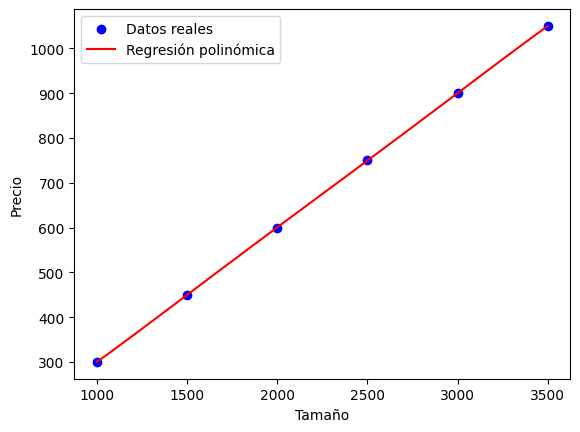

Media (Tamaño): 2250.0, Media (Precio): 675.0, Desviación estándar (Tamaño): 853.9125638299665, Varianza (Tamaño): 729166.6666666666, Covarianza: [[875000. 262500.]
 [262500.  78750.]]
R2 score:  0.9999987140848187
Coeficientes:  [ 0.00000000e+00  2.49064274e-07  3.04033039e-04 -1.46303776e-07
  3.36378492e-11 -2.97232866e-15]
Intercepción:  111.68242836152126


In [10]:
# Datos de entrada
size = np.array([1000, 1500, 2000, 2500, 3000, 3500]).reshape(-1, 1)
n_size = np.array([1000, 1500, 2000, 2500, 3000, 3500])
price = np.array([300, 450, 600, 750, 900, 1050])

# Características polinomiales
caracteristicas = PolynomialFeatures(degree=5)
polinomio_size = caracteristicas.fit_transform(size)

# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(polinomio_size, price)

# Predicciones para los tamaños originales
price_pred_original = modelo.predict(polinomio_size)

# Predicciones para la gráfica
size_pred = np.linspace(1000, 3500, 100).reshape(-1, 1)
polinomio_size_pred = caracteristicas.fit_transform(size_pred)
price_pred = modelo.predict(polinomio_size_pred)

# Cálculo de estadísticas
media_size = np.mean(n_size)
media_price = np.mean(price)
std = np.std(n_size)
var = np.var(n_size)
cov = np.cov(n_size, price)
r2 = r2_score(price, price_pred_original)  # Corrección aquí

# Gráfica
plt.scatter(size, price, color="Blue", label="Datos reales")
plt.plot(size_pred, price_pred, color="Red", label="Regresión polinómica")
plt.xlabel("Tamaño")
plt.ylabel("Precio")
plt.legend()
plt.show()

# Mostrar estadísticas
print(
    "Media (Tamaño): {}, Media (Precio): {}, Desviación estándar (Tamaño): {}, Varianza (Tamaño): {}, Covarianza: {}".format(
        media_size, media_price, std, var, cov
    )
)
print("R2 score: ", r2)
print("Coeficientes: ", modelo.coef_)
print("Intercepción: ", modelo.intercept_)

#### Regresión polinómica con más de 1 variable independiente


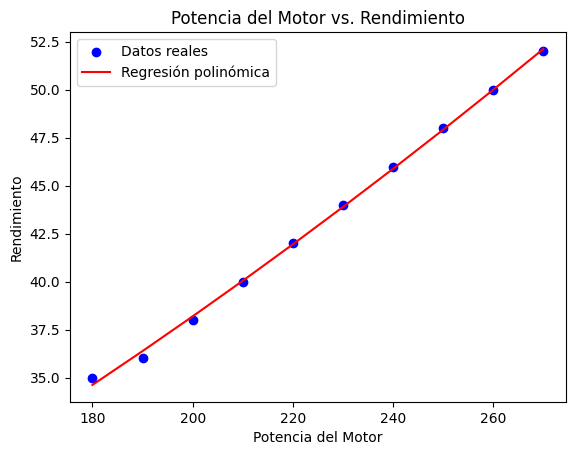

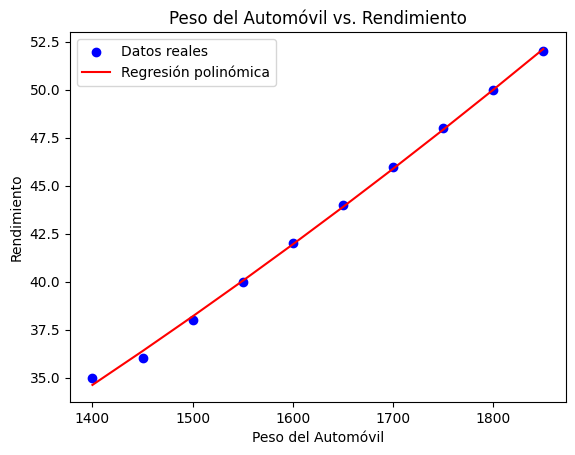

Text(0, 0.5, 'Rendimiento')

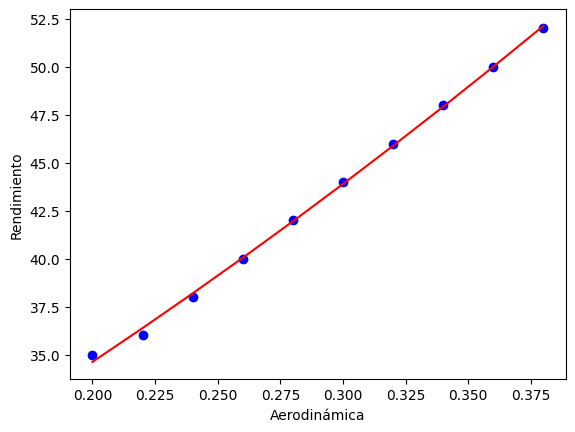

In [11]:
potencia_motor = np.array([180, 190, 200, 210, 220, 230, 240, 250, 260, 270])
peso_automovil = np.array([1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850])
aerodinamica = np.array([0.20, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.38])
rendimiento = np.array([35, 36, 38, 40, 42, 44, 46, 48, 50, 52])

X = np.column_stack((potencia_motor, peso_automovil, aerodinamica))

scaler = StandardScaler()
X_escalada = scaler.fit_transform(X)

caracteristicas = PolynomialFeatures(degree=2)
polinomio_X = caracteristicas.fit_transform(X_escalada)

modelo = LinearRegression()
modelo.fit(polinomio_X, rendimiento)

y_pred = modelo.predict(polinomio_X)

indices_ordenados = potencia_motor.argsort()
potencia_motor_ordenado = potencia_motor[indices_ordenados]
peso_automovil_ordenado = peso_automovil[indices_ordenados]
aerodinamica_ordenado = aerodinamica[indices_ordenados]
y_pred_ordenado = y_pred[indices_ordenados]


plt.scatter(potencia_motor, rendimiento, color="blue", label="Datos reales")
plt.plot(
    potencia_motor_ordenado, y_pred_ordenado, color="red", label="Regresión polinómica"
)
plt.xlabel("Potencia del Motor")
plt.ylabel("Rendimiento")
plt.title("Potencia del Motor vs. Rendimiento")
plt.legend()
plt.show()

plt.scatter(peso_automovil, rendimiento, color="blue", label="Datos reales")
plt.plot(
    peso_automovil_ordenado, y_pred_ordenado, color="red", label="Regresión polinómica"
)
plt.xlabel("Peso del Automóvil")
plt.ylabel("Rendimiento")
plt.title("Peso del Automóvil vs. Rendimiento")
plt.legend()
plt.show()

plt.scatter(aerodinamica, rendimiento, color="blue", label="Datos reales")
plt.plot(
    aerodinamica_ordenado, y_pred_ordenado, color="red", label="Regresión polinómica"
)
plt.xlabel("Aerodinámica")
plt.ylabel("Rendimiento")
